In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

ModuleNotFoundError: No module named 'pandas'

In [2]:
data=pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df=data.copy()

In [4]:
df.InvoiceDate.max()-df.InvoiceDate.min()

Timedelta('373 days 04:24:00')

In [5]:
# unique values in each column
for i in df.columns:
    print(i,':',df[i].nunique())

InvoiceNo : 25900
StockCode : 4070
Description : 4223
Quantity : 722
InvoiceDate : 23260
UnitPrice : 1630
CustomerID : 4372
Country : 38


In [6]:
# missing value
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df=df[df['Country']=='United Kingdom']

<Figure size 720x288 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Top 10 Sold Items')

Text(0.5, 0, 'Item Name')

Text(0, 0.5, 'Number of Quantity Sold')

([<matplotlib.axis.XTick at 0x15df55b70>,
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(2, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(3, 0, 'PARTY BUNTING'),
  Text(4, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(5, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(6, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(7, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(8, 0, 'NATURAL SLATE HEART CHALKBOARD '),
  Text(9, 0, 'HEART OF WICKER SMALL')])

                             Description  Frequency
3898  WHITE HANGING HEART T-LIGHT HOLDER       2271
1858             JUMBO BAG RED RETROSPOT       2001
2899            REGENCY CAKESTAND 3 TIER       1859
2460                       PARTY BUNTING       1634
2045             LUNCH BAG RED RETROSPOT       1460
242        ASSORTED COLOUR BIRD ORNAMENT       1416
3177   SET OF 3 CAKE TINS PANTRY DESIGN        1316
2037             LUNCH BAG  BLACK SKULL.       1292
2242     NATURAL SLATE HEART CHALKBOARD        1250
1703               HEART OF WICKER SMALL       1199


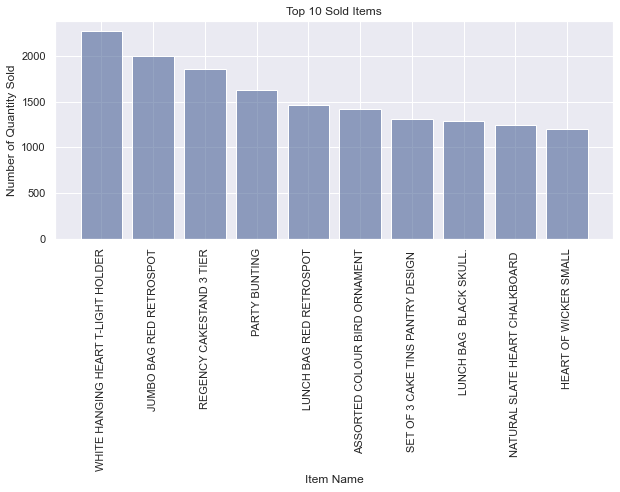

In [8]:
## Creating distribution of Item Sold

Item_distr = df.groupby(by = "Description").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

## Declaring variables

bars = Item_distr["Description"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size

plt.figure(figsize=(10,4))

# Create bars
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars, rotation=90)

# Show graph
print(Item_distr)
plt.show()

In [9]:
# month year sales
df_date=df.set_index(['InvoiceDate']) ## Setting date as index for plotting purpose
df_date

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:31:00,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,1.95,15804.0,United Kingdom
2011-12-09 12:49:00,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2.95,13113.0,United Kingdom
2011-12-09 12:49:00,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,1.25,13113.0,United Kingdom


[Text(0.5, 0, 'InvoiceDate'), Text(0, 0.5, 'Number of Items Sold')]

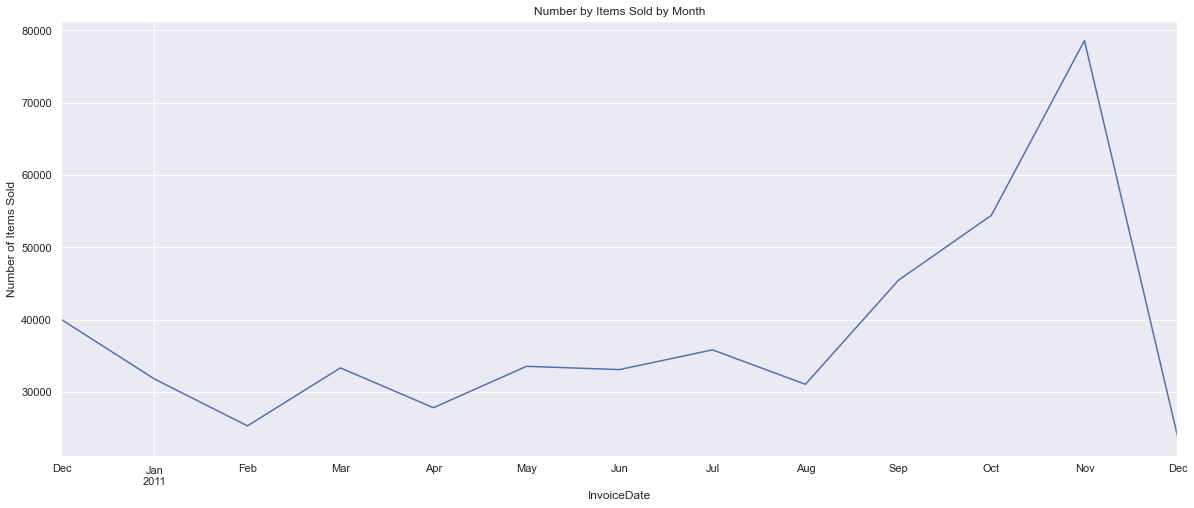

In [10]:
df_date.resample("M")['Description'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "InvoiceDate", ylabel = "Number of Items Sold")

#### Insights
Sales increased rapidly in August and continued to rise until November, then they fell precipitously in December.

This gives the multiple descriptions for one of those items and we witness the simple ways in which data quality can be corrupted in any dataset. A simple spelling mistake can end up in reducing data quality and an erroneous analysis.


In [11]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
unique_desc = df[["StockCode", "Description"]].groupby(by=["StockCode"]).\
                apply(pd.DataFrame.mode).reset_index(drop=True)
unique_desc
q = '''
select df.InvoiceNo, df.StockCode, un.Description, df.Quantity, df.InvoiceDate,
       df.UnitPrice, df.CustomerID, df.Country
from df as df INNER JOIN 
     unique_desc as un on df.StockCode = un.StockCode
'''

df = pysqldf(q)
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df['Total_Amount'] = df.Quantity*df.UnitPrice
df.CustomerID = df.CustomerID.astype('Int64')
df.head(6)

,StockCode,Description
0,10002,INFLATABLE POLITICAL GLOBE
1,10080,GROOVY CACTUS INFLATABLE
2,10120,DOGGY RUBBER
3,10125,MINI FUNKY DESIGN TAPES
4,10133,COLOURING PENCILS BROWN TUBE
...,...,...
4071,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00
4072,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00
4073,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00
4074,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30


In [12]:

PercentSales =  np.round((df.groupby(["CustomerID"]).Total_Amount.sum().\
                          sort_values(ascending = False)[:51].sum()/df.groupby(["CustomerID"]).\
                          Total_Amount.sum().sort_values(ascending = False).sum()) * 100, 2)
print(PercentSales)


29.19


<AxesSubplot:title={'center':'Top Customers: 29.19% Sales Amount'}, xlabel='CustomerID'>

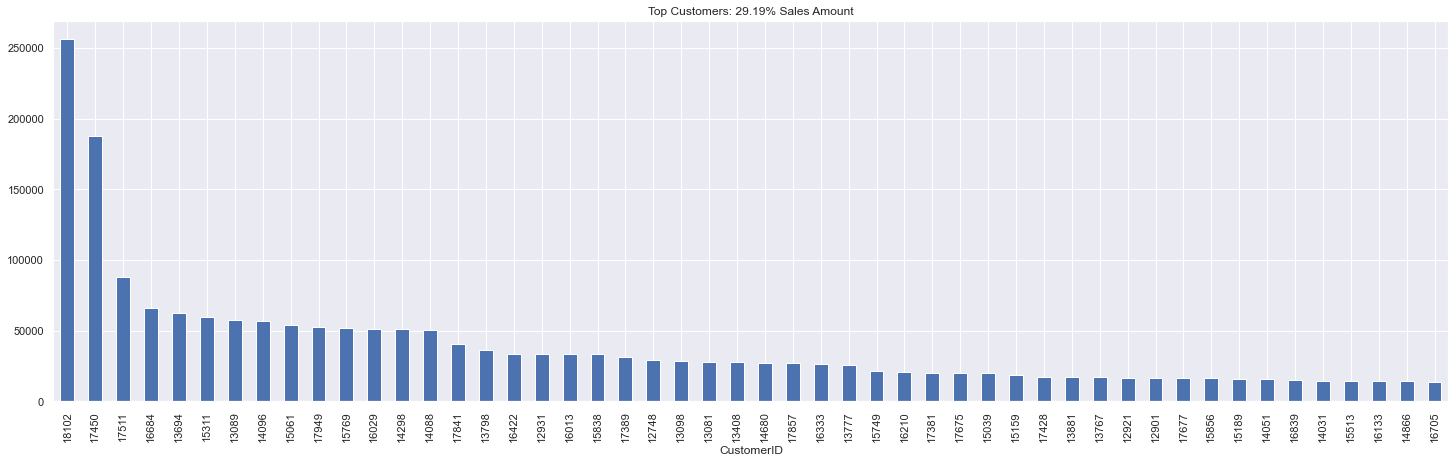

In [13]:
fig = plt.figure(figsize=(25, 7))
g = df.groupby(["CustomerID"]).Total_Amount.sum().sort_values(ascending = False)[:50]
                                                
g.plot(kind='bar', title='Top Customers: {:3.2f}% Sales Amount'.format(PercentSales))

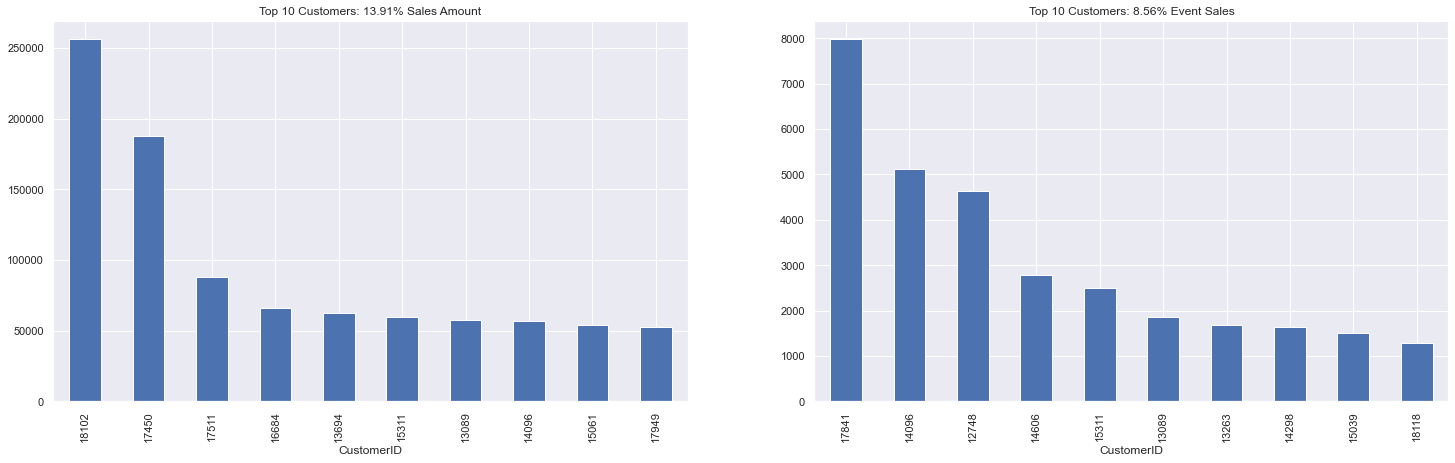

In [14]:

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
PercentSales =  np.round((df.groupby(["CustomerID"]).Total_Amount.sum().\
                          sort_values(ascending = False)[:10].sum()/df.groupby(["CustomerID"]).\
                          Total_Amount.sum().sort_values(ascending = False).sum()) * 100, 2)
g = df.groupby(["CustomerID"]).Total_Amount.sum().sort_values(ascending = False)[:10]\
    .plot(kind='bar', title='Top 10 Customers: {:3.2f}% Sales Amount'.format(PercentSales))
f1 = fig.add_subplot(122)

PercentSales =  np.round((df.groupby(["CustomerID"]).Total_Amount.count().\
                          sort_values(ascending = False)[:10].sum()/df.groupby(["CustomerID"]).\
                          Total_Amount.count().sort_values(ascending = False).sum()) * 100, 2)
g = df.groupby(["CustomerID"]).Total_Amount.count().sort_values(ascending = False)[:10].\
    plot(kind='bar', title='Top 10 Customers: {:3.2f}% Event Sales'.format(PercentSales))

In [19]:
event_sales_check=df[df['CustomerID']==17841]
event_sales_check.shape

(7983, 9)

NameError: name 'AmoutSum' is not defined

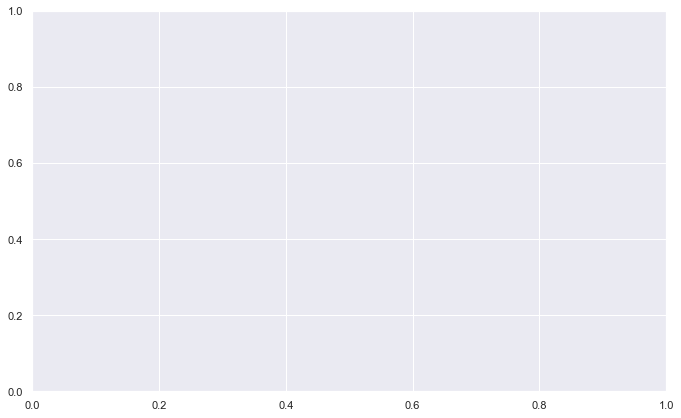

In [18]:
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))

f1 = fig.add_subplot(122)
Top10Ev = list(inv[:10].index)
PercentSales =  np.round((AmoutSum[Top10Ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10Ev].sum()/inv.sum()) * 100, 2)
g = inv[Top10Ev].\
    plot(kind='bar', title='Events of top 10 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))


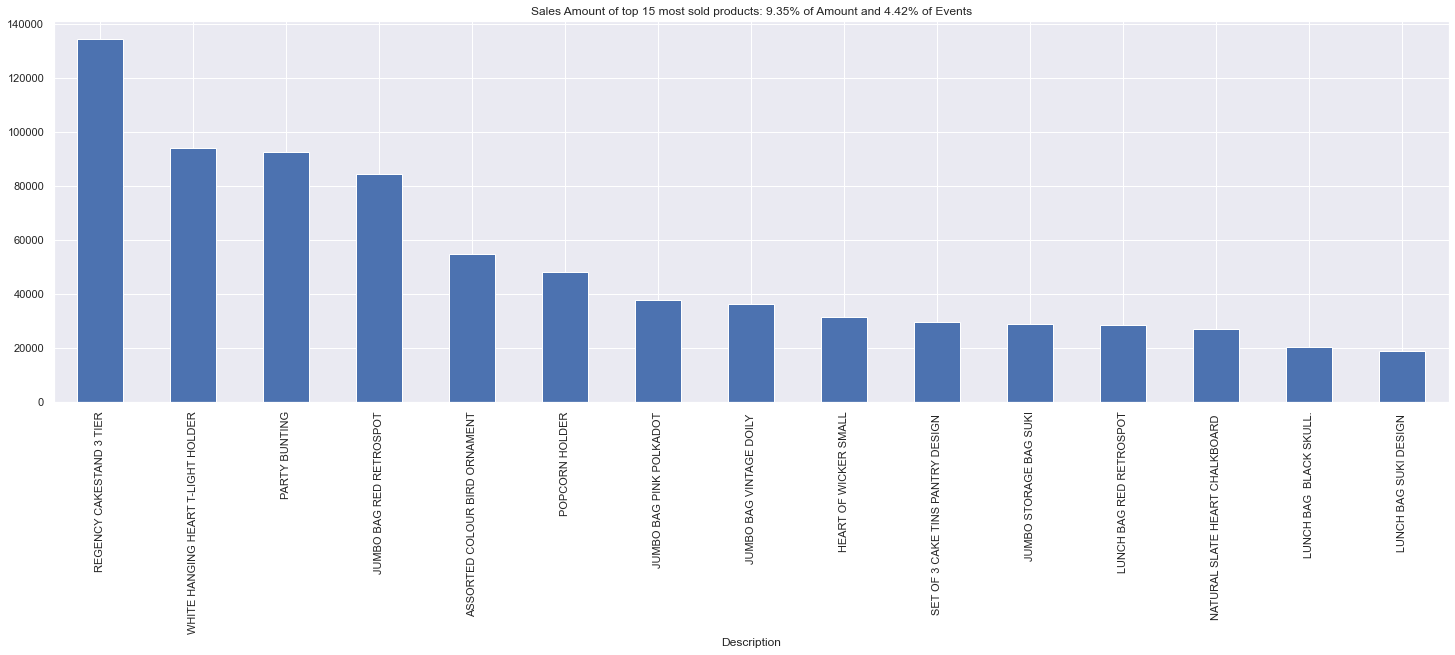

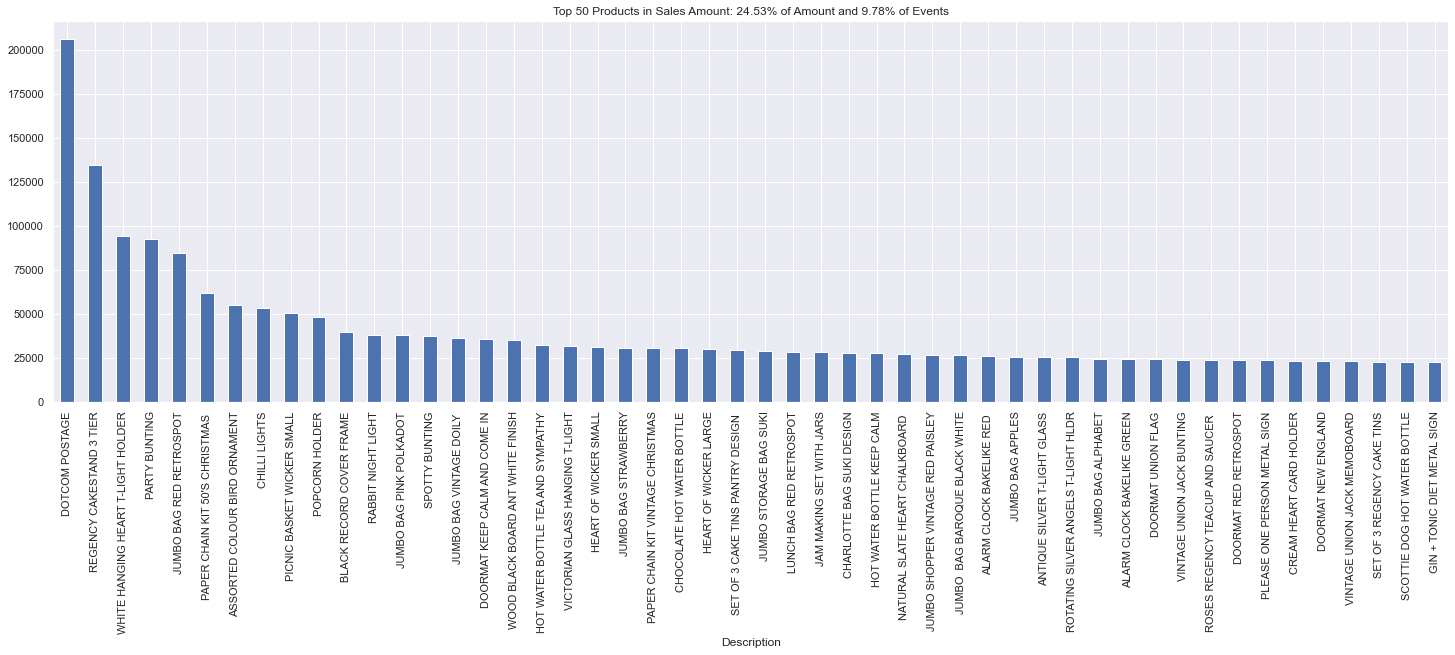

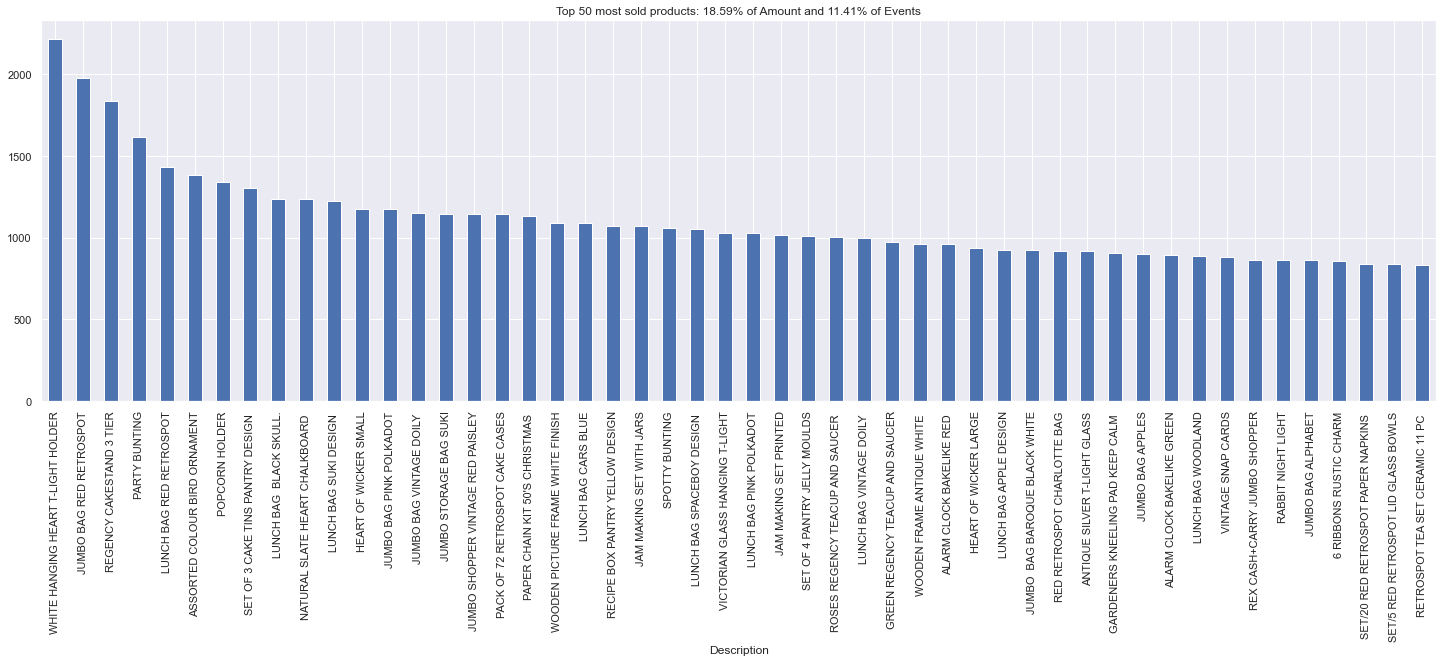

In [20]:
AmoutSum = df.groupby(["Description"]).Total_Amount.sum().sort_values(ascending = False)
inv = df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)



fig = plt.figure(figsize=(25, 7))
Top15ev = list(inv[:15].index)
PercentSales =  np.round((AmoutSum[Top15ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top15ev].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top15ev].sort_values(ascending = False).\
    plot(kind='bar', 
         title='Sales Amount of top 15 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
         format(PercentSales, PercentEvents))

fig = plt.figure(figsize=(25, 7))
Top50 = list(AmoutSum[:50].index)
PercentSales =  np.round((AmoutSum[Top50].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top50].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top50].\
    plot(kind='bar', 
         title='Top 50 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.\
         format(PercentSales, PercentEvents))

fig = plt.figure(figsize=(25, 7))
Top50Ev = list(inv[:50].index)
PercentSales =  np.round((AmoutSum[Top50Ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top50Ev].sum()/inv.sum()) * 100, 2)
g = inv[Top50Ev].\
    plot(kind='bar', title='Top 50 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))


df_growth=df.copy()
df_growth['MONTHLYGROWTH'] = df_growth['InvoiceDate'].dt.strftime('%Y%m')
df_growth.head()
df_growth['MONTHLYGROWTH'] = df_growth['InvoiceDate'].dt.strftime('%Y%m')
df_growth.head()

In [21]:
#Calculate TotalPrice Per Product
df_product = df.groupby("StockCode").agg({"Total_Amount": "sum"}).sort_values("Total_Amount", ascending=False)

df_product.reset_index(inplace=True)

df_product.head()

,StockCode,Total_Amount
0,DOT,206245.48
1,22423,134405.94
2,47566,92501.73
3,85123A,92179.10
4,85099B,84516.44


In [22]:
# bit of cleaning 
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')] # removing transactions with the credit 

In [23]:
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [24]:
basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY,adjustment,damages,ebay,throw away,thrown away,thrown away-can't sell,thrown away-can't sell.
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0. This step will complete the one hot encoding of the data and remove the postage column (since that charge is not one we wish to explore):

In [25]:

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In this section, we will apply the apriori algorithm to find the most frequently purchased items in the dataset. For our minimum support value, we will specify 3%, which means only items whose frequency of occurrence in the data is at least 3% will be returned.

In [ ]:
#Generate the frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True).sort_values("support",ascending=False)
print(frequent_itemsets.head(10))
print(frequent_itemsets.shape)

From the results, we can see that the “White hanging Heart T-Light Holder” is the most frequently purchased item with a support value of 0.108358, meaning it was purchased in ~11% of all transactions.

In [ ]:
#Apply association rules
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)
assoc_rules

Based on the results from implementing association rules, we can see that “Green Regency Teacup and Saucer” and “Pink Regency Teacup and Saucer” have the highest “lift” value, and therefore the highest association of any two products. With a combined support of 0.035, it means both items were purchased together in 3.5% of all transactions.

As far as what marketing strategy to implement with this insight, that will depend on a variety of factors and is a perfect example of how domain knowledge in retail will come in handy. Given that this is an online store, it’s a no-brainer to display each consequent product as a recommendation on the antecedent product page, thereby using the popularity of one product to drive the sales of the other. Another way to attract more sales is to bundle the associated products and implement a bundle pricing technique or a sales promotion around both items.

In [ ]:
#0.005 gave good results
frequent_itemsets = apriori(basket_sets, min_support=0.009, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules

/opt/homebrew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# not sure how to interpret

from pandas.plotting import parallel_coordinates

# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(assoc_rules)

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

Using parallel coordinates to visualize rules
Our visual demonstration in the previous exercise convinced the founder that the supply-confidence border is worthy of further exploration. She now suggests that we extract part of the border and visualize it. Since the rules that fall on the border are strong with respect to most common metrics, she argues that we should simply visualize whether a rule exists, rather than the intensity of the rule according to some metric. We realize that a parallel coordinates plot is ideal for such cases.

Parallel coordinates plot
The parallel coordinates plot will allow us to visualize whether a relationship exist between an antecedent and consequent. We can think of it as a directed network diagram. The plot shows connections between  2  objects that are related and indicates the direction of the relationship.
When to use parallel coordinate plots
Parallel coordinates vs. heatmap.
Don't need intensity information.
Only want to know whether rule exists.
Want to reduce visual clutter.
Parallel coordinates vs. scatterplot.
Want individual rule information.
Not interested in multiple metrics.
Only want to examine final rules.

In [ ]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = assoc_rules)
plt.margins(0.01,0.01)
plt.show()

In [ ]:
#filter for only invoices with 2 or more items
#basket_filtered = basket_encoded[(basket_encoded > 0).sum(axis=1) >= 2]
#basket_filtered

In [ ]:
frequent_itemsets

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt  


In [ ]:
# messy graph
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(assoc_rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [ ]:
#Apply association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)


# MIHIR GO THROUGH BELOW METRICS AND SEE IF WE CAN USE ANY OF THIS IN OUR PROJECT...IF NOT RELEVANT WE WILL REMVOE THIS 

# NEW METHOD 

In [ ]:
# Recover unique InvoiceNo's.
InvoiceNo = df['InvoiceNo'].unique()

# Create basket of items for each transaction.
Transactions = [list(df[df['InvoiceNo'] == u].Description.astype(str)) for u in InvoiceNo]
# Print example transaction.

In [ ]:
Transactions[0]

In [ ]:
# Instantiate transaction encoder.
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder()

# One-hot encode transactions.
onehot = encoder.fit(Transactions).transform(Transactions)

# Use unique items as column headers.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print onehot header.
onehot.head()

## Performing aggregation
After completing minor consulting jobs we've finally received our first big market basket analysis project: advising an online novelty gifts retailer on cross-promotions. Since the retailer has never previously hired a data scientist, they would like you to start the project by exploring its transaction data. They have asked us to perform aggregation for all signs in the dataset and also compute the support for this category

In [ ]:
# Convert words to a list of words
def convert_str(string):
    lst = list(string.split(' '))
    return lst

In [ ]:
# Select the column headers for sign items
sign_headers = []
for i in onehot.columns:
    wrd_lst = convert_str(str(i).lower())
    if 'sign' in wrd_lst:
        sign_headers.append(i)

In [ ]:
# Select columns of sign items
sign_columns = onehot[sign_headers]

# Perform aggregation of sign items into sign category
signs = sign_columns.sum(axis = 1) >= 1.0

# Print support for signs
print('Share of Signs: %.2f' % signs.mean())

# Defining an aggregation function
Surprised by the high share of sign items in its inventory, the retailer decides that it makes sense to do further aggregation for different categories to explore the data better. This seems trivial to us, but the retailer has not previously been able to perform even a basic descriptive analysis of its transaction and items.

The retailer asks us to perform aggregation for the candles, bags, and boxes categories. To simplify the task, we decide to write a function. It will take a string that contains an item's category. It will then output a DataFrame that indicates whether each transaction includes items from that category.

In [ ]:
def aggregate(item):
    # Select the column headers for sign items
    item_headers = []
    for i in onehot.columns:
        wrd_lst = convert_str(str(i).lower())
        if item in wrd_lst:
            item_headers.append(i)

    # Select columns of sign items
    item_columns = onehot[item_headers]

    # Return category of aggregated items
    return item_columns.sum(axis = 1) >= 1.0

In [ ]:
# Aggregate items for the bags, boxes, and candles categories  
bags = aggregate('bag')
boxes = aggregate('box')
candles = aggregate('candle')

print('Share of Bags: %.2f' % bags.mean())
print('Share of Boxes: %.2f' % boxes.mean())
print('Share of Candles: %.2f' % candles.mean())

# Identifying frequent itemsets with Apriori
The aggregation exercise we performed for the online retailer proved helpful. It offered a starting point for understanding which categories of items appear frequently in transactions. The retailer now wants to explore the individual items themselves to find out which are frequent.

Here we'll apply the Apriori algorithm to the online retail dataset without aggregating first. Our objective will be to prune the itemsets using a minimum value of support and a maximum item number threshold.

In [ ]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, 
                            min_support = 0.05, 
                            max_len = 3, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
frequent_itemsets.head()

# Selecting a support threshold
The manager of the online gift store looks at the results we provided from the previous exercise and commends us for the good work. She does, however, raise an issue: all of the itemsets we identified contain only one item. She asks whether it would be possible to use a less restrictive rule and to generate more itemsets, possibly including those with multiple items.

After agreeing to do this, we think about what might explain the lack of itemsets with more than  1  item. It can't be the max_len parameter, since that was set to  3 . We decide it must be support and decide to test two different values, each time checking how many additional itemsets are generated.

In [ ]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using a support of 0.04 and length of 3
frequent_itemsets_1 = apriori(onehot, min_support = 0.04, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.05 and length of 3
frequent_itemsets_2 = apriori(onehot, min_support = 0.05, 
                            max_len = 3, use_colnames = True)

# Print the number of freqeuent itemsets
print(len(frequent_itemsets_1), len(frequent_itemsets_2))

# Basic Apriori results pruning
Apriori prunes itemsets.

Applies minimum support threshold.

Modi ed version can prune by number of items.

Doesn't tell us about association rules.

# Association rules.
Many more association rules than itemsets.

{Bags, Boxes}: Bags -> Boxes OR Boxes -> Bags.
# How to compute association rules
Computing rules from Apriori results.

Difficult to enumerate for high  𝑛  and  𝑘 .

Could undo itemset pruning by Apriori.

Reducing number of association rules.

mlxtend module offers means of pruning association rules.

association_rules() takes frequent items, metric, and threshold.

# Generating association rules

Previously we computed itemsets for the novelty gift store owner using the Apriori algorithm. You told the store owner that relaxing support from 0.05 to 0.04 increased the number of itemsets from  50  to  87 . Satisfied with the descriptive work we've done, the store manager asks us to identify some association rules from those two sets of frequent itemsets we computed.

Our objective is to determine what association rules can be mined from these itemsets.

In [ ]:
# Import the association rule function from mlxtend
from mlxtend.frequent_patterns import association_rules

# Compute all association rules for frequent_itemsets_1
rules_1 = association_rules(frequent_itemsets_1, 
                            metric = "support", 
                            min_threshold = 0.001)

# Compute all association rules for frequent_itemsets_2
rules_2 = association_rules(frequent_itemsets_2, 
                            metric = "support", 
                            min_threshold = 0.002)

# Print the number of association rules generated
print(len(rules_1), len(rules_2))

In [ ]:
# Import the association rules function
from mlxtend.frequent_patterns import association_rules

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.03, 
                            max_len = 2, use_colnames = True)

# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                            min_threshold = 1.0)

# Print association rules
rules.info()

In [ ]:
rules.head()

# PRUNING WITH CONFIDENCE
We decide to see whether pruning by another metric might allow us to narrow things down even further.

What would be the right metric? Both lift and support are identical for all rules that can be generated from an itemset, so we decide to use confidence instead, which differs for rules produced from the same itemset.



In [ ]:
rules.head()

In [ ]:

# Import the association rules function
from mlxtend.frequent_patterns import apriori, association_rules

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.03, 
                            max_len = 2, use_colnames = True)

# Compute all association rules using confidence
rules = association_rules(frequent_itemsets, 
                            metric = "confidence", 
                            min_threshold = 0.4)

# Print association rules
rules.info()

# Aggregation and filtering
The store manager is now asking us to generate a floorplan proposal, where each pair of sections should contain one high support product and one low support product.



In [ ]:
# Aggregate items
signs = aggregate('sign')

# Concatenate aggregated items into 1 DataFrame
aggregated = pd.concat([bags, boxes, candles, signs],axis=1)
aggregated.columns = ['bag','box','candle','sign']

# Apply the apriori algorithm with a minimum support of 0.04
frequent_itemsets = apriori(aggregated, min_support = 0.04, use_colnames = True)

# Generate the initial set of rules using a minimum support of 0.01
rules = association_rules(frequent_itemsets, 
                          metric = "support", min_threshold = 0.01)

# Set minimum antecedent support to 0.35
rules = rules[rules['antecedent support'] > 0.35]

# Set maximum consequent support to 0.35
rules = rules[rules['consequent support'] < 0.35]

# Print the remaining rules
rules.info()

# Applying Zhang's rule
We learned that Zhang's rule is a continuous measure of association between two items that takes values in the  −1,+1  interval. A  −1  value indicates a perfectly negative association and a  +1  value indicates a perfectly positive association. In this exercise, we'll determine whether Zhang's rule can be used to refine a set of rules a gift store is currently using to promote products.

We will start by re-computing the original set of rules. After that, we will apply Zhang's metric to select only those rules with a high and positive association.

In [ ]:
# Funtion to compute Zhang's rule from mlxtend association_rules output
def zhangs_rule(rules):
    PAB = rules['support'].copy()
    PA = rules['antecedent support'].copy()
    PB = rules['consequent support'].copy()
    NUMERATOR = PAB - PA*PB
    DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
    return NUMERATOR / DENOMINATOR

In [ ]:
# Generate the initial set of rules using a minimum lift of 1.00
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.00)

# Set antecedent support to 0.04
rules = rules[rules['antecedent support'] > 0.04]

# Set consequent support to 0.04
rules = rules[rules['consequent support'] > 0.04]

# Compute Zhang's rule
rules['zhang'] = zhangs_rule(rules)

# Set the lower bound for Zhang's rule to 0.5
rules = rules[rules['zhang'] > 0.5]
rules[['antecedents', 'consequents']].info()

In [ ]:
rules.tail()

# Advanced filtering with multiple metrics
Earlier, we used data from an online novelty gift store to find antecedents that could be used to promote a targeted consequent. Since the set of potential rules was large, we had to rely on the Apriori algorithm and multi-metric filtering to narrow it down. In this exercise, we'll examine the full set of rules and find a useful one, rather than targeting a particular antecedent.

In this exercise, we'll apply the Apriori algorithm to identify frequent itemsets. We'll then recover the set of association rules from the itemsets and apply multi-metric filtering.

In [ ]:
# Apply the Apriori algorithm with a minimum support threshold of 0.04
frequent_itemsets = apriori(onehot, min_support = 0.04, use_colnames = True)

# Recover association rules using a minium support threshold of 0.01
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.01)

# Apply a 0.002 antecedent support threshold, 0.01 confidence threshold, and 2.50 lift threshold
filtered_rules = rules[(rules['antecedent support'] > 0.002) &
                       (rules['consequent support'] > 0.01) &
                       (rules['confidence'] > 0.60) &
                       (rules['lift'] > 2.50)]

# Print remaining rule
filtered_rules[['antecedents','consequents']]